In [2]:
from pc_completions.distance_fields import load_unsigned_distance_field
import numpy as np
from geo_tool import Point_Cloud

In [3]:
%matplotlib inline

In [4]:
in_f = '/scr/optas/DATA/Distance_Fields/shapenet_dim32_df/03001627/1033ee86cc8bac4390962e4fb7072b86__0__.df'

True


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


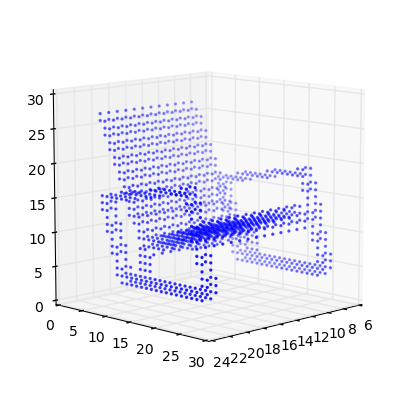

In [5]:
in_df = load_unsigned_distance_field(in_f)
print np.all(in_df >= 0)
min_prc = 0
max_prc = 0.6
in_df[np.logical_or(in_df < min_prc,  in_df > max_prc)] = 0
x, y, z = np.where(in_df)
true_points = np.vstack((z, y, x)).T
Point_Cloud(true_points).plot(in_u_sphere=False, azim=45);

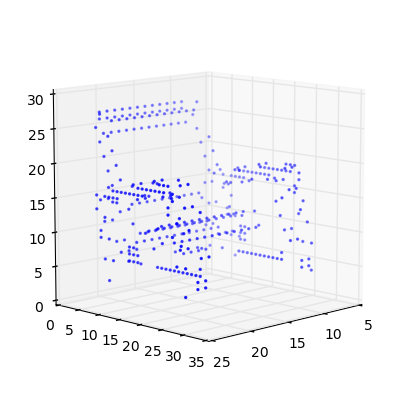

In [6]:
in_df = load_unsigned_distance_field(in_f)
# min_prc = np.percentile(in_df.flatten(), 8)
# max_prc = np.percentile(in_df.flatten(), 9)
min_prc = 1
max_prc = 1.2
in_df[np.logical_or(in_df < min_prc,  in_df > max_prc)] = 0
x, y, z = np.where(in_df)
false_points = np.vstack((z, y, x)).T
Point_Cloud(false_points).plot(in_u_sphere=False, azim=45);

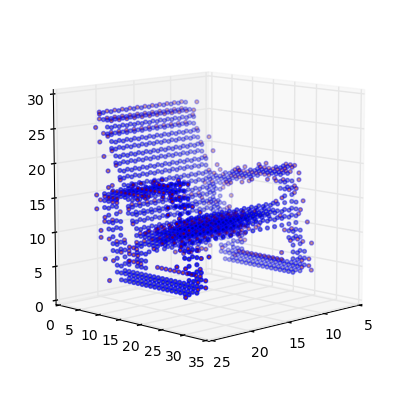

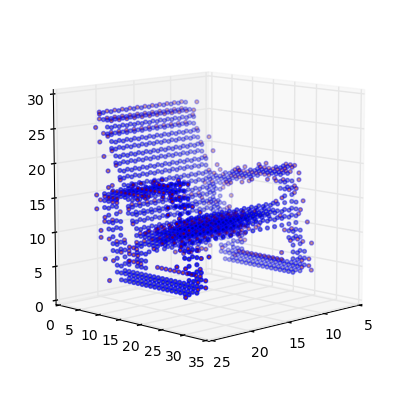

In [7]:
all_points = np.vstack((true_points, false_points))
c = np.ones(len(all_points)) * 100
c[:len(true_points)] = 5
Point_Cloud(all_points).plot(in_u_sphere=False, c=c, s=30, azim=45)

In [21]:
from tf_lab.iclr.helper import load_multiple_version_of_pcs

In [24]:
top_data_dir = '/orions4-zfs/projects/optas/DATA/'
syn_id = '03001627'
in_data = load_multiple_version_of_pcs('uniform_one', syn_id, n_classes=1)
# train_data = in_data['train']

679 pclouds were loaded. They belong in 1 shape-classes.
5761 pclouds were loaded. They belong in 1 shape-classes.
338 pclouds were loaded. They belong in 1 shape-classes.


In [75]:
from tf_lab.nips.helper import compute_3D_sphere
from general_tools.clustering.convenience import find_nearest_neighbors
from scipy.spatial.distance import cdist
pc_sphere = compute_3D_sphere(128)[0]

In [146]:
true_points = in_data['train'].point_clouds[1]
pc = Point_Cloud(true_points.astype(np.float32))
pc.center_in_unit_sphere()
pc_points = pc.points

In [147]:
k_ids, k_dists = find_nearest_neighbors(pc_sphere, pc_points, 1)

In [148]:
b = cdist(pc_points, pc_points)
np.fill_diagonal(b, np.Inf)

In [149]:
max_min = np.max(np.sort(b, axis=1)[:,0])

In [150]:
far_enough = k_dists > 1.0 * max_min

In [151]:
idx = np.arange(len(k_ids))

In [152]:
temp_d = k_dists[far_enough]

In [153]:
lala = np.argsort(temp_d)[:2048]
lele = idx[np.hstack(far_enough)][lala]

In [154]:
s_ids = lele

In [155]:
false_points_2 = pc_sphere[np.array(s_ids)]

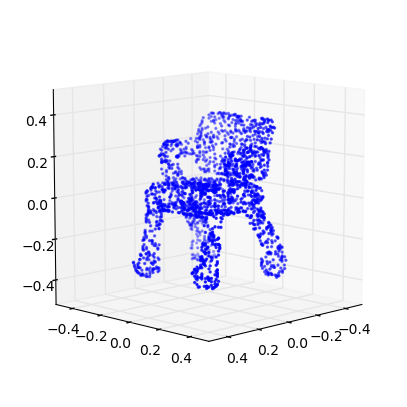

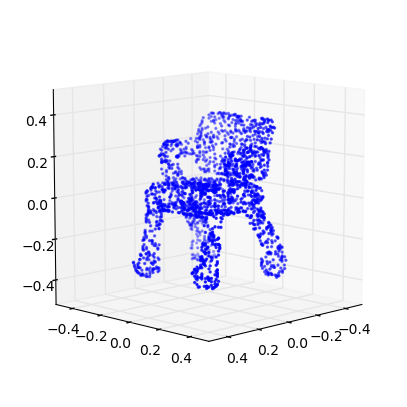

In [156]:
Point_Cloud(false_points_2).plot(azim=45)

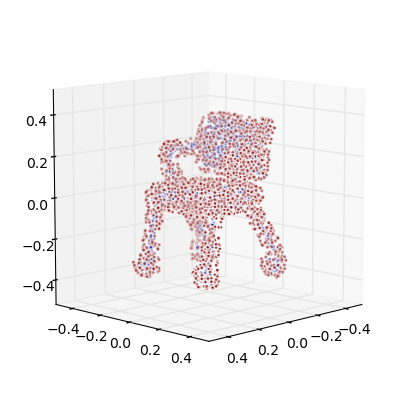

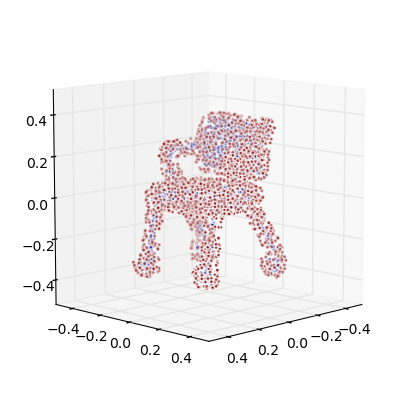

In [157]:
all_points = np.vstack((pc_points, false_points_2))
c = np.ones(len(all_points)) * 100
c[:len(true_points)] = 5
Point_Cloud(all_points).plot(in_u_sphere=True, c=c, s=30, azim=45, color='white')